# 데이터 소개

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

cifar10 데이터셋 : https://www.cs.toronto.edu/~kriz/cifar.html

kaggle 데이터셋 추천 : https://insightcampus.co.kr/insightcommunity/?mod=document&uid=12908

과일,야체 데이터셋 : https://www.kaggle.com/moltean/fruits

원숭이 10종 데이터셋  :https://www.kaggle.com/slothkong/10-monkey-species

와인 데이터셋 : https://archive.ics.uci.edu/ml/datasets/Wine+Quality


In [2]:

from tensorflow import keras
from torchvision import datasets
import pandas as pd
import torch
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np

# drive.mount('/content/drive')



In [3]:

cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print('##########################')
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)


170500096/170498071 [==============================] - 11s 0us/step
X_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
##########################
X_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


In [ ]:
print(32*32*3)

3072


In [4]:
# R G B 채널로 이루어져 있어서 1000개 가져와도 3000개임

X_train = X_train[:10000].reshape(-1,32*32*3)
y_train = y_train[:10000]

X_test = X_test[:10000].reshape(-1,32*32*3)
y_test = y_test[:10000]

print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)

X_train shape :  (10000, 3072)
y_train shape :  (10000, 1)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
class_names = np.array(class_names)

In [ ]:
# plt.imshow()는 이미지를 출력하는 함수입니다. 이 함수는 Channel Last 형태의 이미지 데이터만을 지원합니다. 
# 따라서 Channel First을 Channel Last 포멧으로 변경해야 했습니다.

In [ ]:
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# def plot_cifar10(data):
# # def plot_digit(data):
#     image = data.reshape(32, 32,3)
#     plt.imshow(image, cmap = mpl.cm.binary,
#                interpolation="nearest")
#     plt.axis("off")
    
#   # 숫자 그림을 위한 추가 함수
#   #def plot_digits(instances, images_per_row=10, **options):
# def plot_cifar10s(instances, images_per_row=10, **options):
#     index = 0
#     size = 32
#     images_per_row = min(len(instances), images_per_row)
#     images = [instance.reshape(size,size,3) for instance in instances]
#     n_rows = (len(instances) - 1) // images_per_row + 1
#     row_images = []
#     n_empty = n_rows * images_per_row - len(instances)
#     images.append(np.zeros((size, size * n_empty)))
#     for row in range(n_rows):
#         rimages = images[row * images_per_row : (row + 1) * images_per_row]
#         row_images.append(np.concatenate(rimages, axis=1))
#         plt.title(class_names[y_train[index]], fontsize=12)
#         index = index + 1
#     image = np.concatenate(row_images, axis=0)
#     plt.imshow(image, cmap = mpl.cm.binary, **options)
#     plt.axis("off")
    

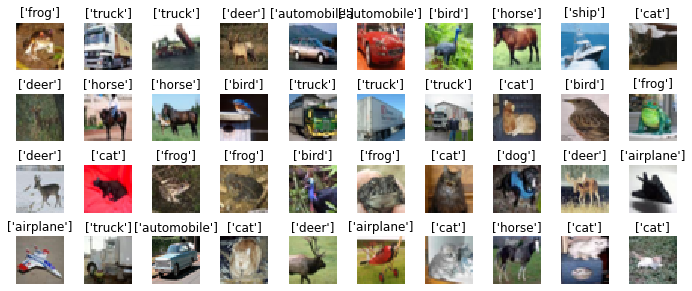

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
# images = [i.reshape(size,size,3) for i in X_train]

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index].reshape(32,32,3), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

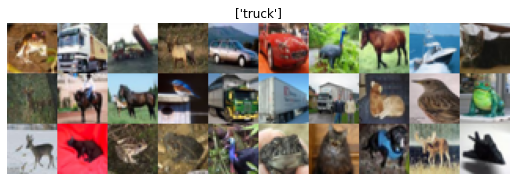

In [ ]:
# plt.figure(figsize=(9,9))

# example_images = X_train[:30]
# plot_cifar10s(example_images, images_per_row=10)
# plt.show()

['frog']


Text(0.5, 1.0, "['frog']")

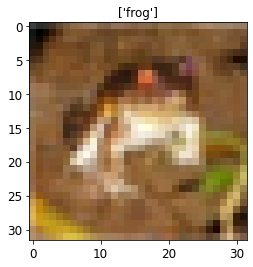

In [ ]:

#data가 섞여서 들어가있다. 0번째에는 class_names 9번째의 ankle boot가 있다.

idx = 0
some_pick = X_train[idx]
some_pick_image = some_pick.reshape(32,32,3)
some_pick_label = y_train[idx]
print(class_names[some_pick_label])
plt.imshow(some_pick_image, cmap=mpl.cm.binary)
plt.title(class_names[some_pick_label])

# idx = 0
# some_digit = X_train[idx]
# some_digit_image = some_digit.reshape(32,32,3)
# some_digit_label = y_train[idx]
# print(class_names[some_digit_label])
# plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.title(class_names[some_digit_label])

# plt.imshow(some_digit_image,(1, 2, 0))


# 모델 만들기 

In [6]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
# train_on_gpu = torch.cuda.is_available()
# #train_on_gpu = False

# if not train_on_gpu:
#     print('CUDA is not available.  Training on CPU ...')
# else:
#     print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:


model_RandomF = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
model_RandomF.fit(X_train,y_train)

# test셋으로 값을 예측
y_pred = model_RandomF.predict(X_test)
print('test샘플에 대한 정확도 :', accuracy_score(y_test, y_pred))

# train셋으로 값을 예측 -> 과적합이 된것을 알 수 있다.
y_pred_tra = model_RandomF.predict(X_train)
print('train샘플에 대한 정확도 :', accuracy_score(y_train, y_pred_tra))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:

# y_pred = model_RandomF.predict(X_test)
# print(accuracy_score(y_test, y_pred))

# test셋으로 값을 예측
y_pred = model_RandomF.predict(X_test)
print('test샘플에 대한 정확도 :', accuracy_score(y_test, y_pred))

# train셋으로 값을 예측 -> 과적합이 된것을 알 수 있다.
y_pred_tra = model_RandomF.predict(X_train)
print('train샘플에 대한 정확도 :', accuracy_score(y_train, y_pred_tra))

# model_RandomF_accuracy = model_RandomF.score(X_test,y_test)
# print(model_RandomF_accuracy)

test샘플에 대한 정확도 : 0.4316
train샘플에 대한 정확도 : 1.0


In [ ]:
# # 특징의 중요도 출력

# for name, score in zip(class_names, model_RandomF.feature_importances_):
#     print(name, score)

airplane 0.00026922098715042285
automobile 0.0002767411779064731
bird 0.0005319435592228794
cat 0.0002621181625098933
deer 0.0002588419659688959
dog 0.0008131228600010198
frog 0.00033934607054589836
horse 0.0002765722758320589
ship 0.0005833583540059139
truck 0.00028708862079012835


# 규제 해보기


In [ ]:
# 과적합이 일어났기 때문에 규제를 통해 성능을 증가시킴 
# 규제를 해도 성능이 많이 올라가지는 않음 , 하지만 33%에서  44% 까지 증가시킴 


def learning():
  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=5000,
  #                                        min_samples_split=100)#37%, test:33%

  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=2000,
  #                                        min_samples_split=100)#61%, test:39%

  # model_RandomF = RandomForestClassifier(n_estimators = 1000, random_state=42, max_leaf_nodes=5000,
  #                                        min_samples_split=100)#61%, test:39%

  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=5000,
  #                                        min_samples_split=100)#61%, test:39%
  
  # model_RandomF = RandomForestClassifier(n_estimators = 200, random_state=42, max_leaf_nodes=2000,
  #                                        min_samples_split=500)#38%, test:39%

  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=2000,
  #                                        min_samples_split=50)#79%, test:41%

  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=2000,
  #                                        min_samples_split=100)#79%, test:41%

  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=1000,
  #                                        min_samples_split=200)#99%, test:43%

  # model_RandomF = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=42,
  #                                        max_leaf_nodes=1000)# 93%,test:43%

  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=2000,
  #                                        min_samples_split=10)#99%, test:44%

  model_RandomF.fit(X_train, y_train)
  train_accuracy = 0
  test_accuracy = 0
  train_accuracy = model_RandomF.score(X_train,y_train)
  test_accuracy = model_RandomF.score(X_test,y_test)
  a = (train_accuracy-test_accuracy)#정확도 차이
  print("train 데이터정확도=",train_accuracy,", test 데이터정확도=",test_accuracy,". 차이=",a)

learning()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train 데이터정확도= 0.379 , test 데이터정확도= 0.3387 . 차이= 0.0403


# 규제해서 성능 한계있어서 2번째 방법인 데이터를 늘려봄

In [ ]:
# 데이터 늘림

cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:20000].reshape(-1,32*32*3)
y_train = y_train[:20000]

X_test = X_test[:20000].reshape(-1,32*32*3)
y_test = y_test[:20000]

# R G B 채널로 이루어져 있어서 1000개 가져와도 3000개임

print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)

X_train shape :  (20000, 3072)
y_train shape :  (20000, 1)


In [ ]:

def learning():

  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=2000,
  #                                        min_samples_split=50)#79%, test:43%


  # model_RandomF = RandomForestClassifier(n_estimators = 200, random_state=42, max_leaf_nodes=2000,
  #                                        min_samples_split=50)#79%, test:43%

  model_RandomF = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

  model_RandomF.fit(X_train, y_train)
  train_accuracy = 0
  test_accuracy = 0
  train_accuracy = model_RandomF.score(X_train,y_train)
  test_accuracy = model_RandomF.score(X_test,y_test)
  a = (train_accuracy-test_accuracy)#정확도 차이
  print("train 데이터정확도=",train_accuracy,", test 데이터정확도=",test_accuracy,". 차이=",a)

learning()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


train 데이터정확도= 1.0 , test 데이터정확도= 0.458 . 차이= 0.542


In [ ]:
# 데이터 늘림

cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:30000].reshape(-1,32*32*3)
y_train = y_train[:30000]

X_test = X_test[:30000].reshape(-1,32*32*3)
y_test = y_test[:30000]

# R G B 채널로 이루어져 있어서 1000개 가져와도 3000개임

print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)

X_train shape :  (30000, 3072)
y_train shape :  (30000, 1)


In [ ]:

def learning():


  model_RandomF = RandomForestClassifier(n_estimators = 200, random_state=42, max_leaf_nodes=2000,
                                         min_samples_split=50)#79%, test:43%

  model_RandomF.fit(X_train, y_train)
  train_accuracy = 0
  test_accuracy = 0
  train_accuracy = model_RandomF.score(X_train,y_train)
  test_accuracy = model_RandomF.score(X_test,y_test)
  a = (train_accuracy-test_accuracy)#정확도 차이
  print("train 데이터정확도=",train_accuracy,", test 데이터정확도=",test_accuracy,". 차이=",a)

learning()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


train 데이터정확도= 0.7965333333333333 , test 데이터정확도= 0.442 . 차이= 0.3545333333333333


In [ ]:

cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:10000].reshape(-1,32*32*3)
y_train = y_train[:10000]

X_test = X_test[:10000].reshape(-1,32*32*3)
y_test = y_test[:10000]

# R G B 채널로 이루어져 있어서 1000개 가져와도 3000개임

print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)

X_train shape :  (10000, 3072)
y_train shape :  (10000, 1)


In [ ]:
# 정규화

# 소프트맥스 회귀는 이를 확장한 것이다. 이진 분류문제가 아닌, 
# 다중 분류를 해결하기 위한 모델을 제안한 것이 바로 소프트맥스 함수이다. 
# 소프트맥스 함수는 여러 개의 연산 결과를 정규화하여 모든 클래스의 확률값의 합을 1로 만들자는 간단한 아이디어다.


from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from sklearn.preprocessing import StandardScaler


def learning():

  model_RandomF = RandomForestClassifier(n_estimators = 200, random_state=42,)#100%, test:43%

  # model_RandomF = RandomForestClassifier(n_estimators = 200, random_state=42, max_leaf_nodes=2000,
  #                                        min_samples_split=50)#78%, test:40%

  model_RandomF.fit(X_train, y_train)

  train_accuracy = 0
  test_accuracy = 0
  train_accuracy = model_RandomF.score(X_train,y_train)
  test_accuracy = model_RandomF.score(X_test,y_test)
  a = (train_accuracy-test_accuracy)#정확도 차이
  print("train 데이터정확도=",train_accuracy,", test 데이터정확도=",test_accuracy,". 차이=",a)

learning()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train 데이터정확도= 1.0 , test 데이터정확도= 0.4316 . 차이= 0.5684


# 모델을 인공신경망으로 다시 구성


In [36]:
from sklearn.preprocessing import StandardScaler

cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:40000].reshape(-1,32*32*3)
y_train = y_train[:40000]

X_test = X_test[:10000].reshape(-1,32*32*3)
y_test = y_test[:10000]

# R G B 채널로 이루어져 있어서 1000개 가져와도 3000개임

print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)

X_train shape :  (40000, 3072)
y_train shape :  (40000, 1)


In [37]:
# keras로 모델 만드는 방법
# Sequential (Layer를 순서대로 쌓는 방법) -> 가장 편리하다. 
# Function API ( Layer들의 연결을 사용자가 조정)
# Subclassiong API (사용자가 클래스 만들어서 동적으로 생성)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(32*32*3)

3072


In [38]:

# Sequential= keras의 모델 만드는 방법중 하나 -> Layer를 쌓는 방법
# Dense = 중간 (hidden)노드 들 몇개 만들것인지
# Flatten = input의 형태를 지정 -> 32 * 32 * 3 의 형태를 1차원으로 바꿔줌 ->  3072 로 변경
# 소프트맥스 회귀는 이를 확장한 것이다. 이진 분류문제가 아닌, 
# 다중 분류를 해결하기 위한 모델을 제안한 것이 바로 소프트맥스 함수이다. 
# 소프트맥스 함수는 여러 개의 연산 결과를 정규화하여 모든 클래스의 확률값의 합을 1로 만들자는 간단한 아이디어다.
# relu =  0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환하는 함수다. 

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32,3]),# 특징이 32 * 32 가지이다. 3072
    keras.layers.Dense(1536, activation="relu"),
    keras.layers.Dense(718, activation="relu"),
    # keras.layers.Dense(359, activation="relu"),
    keras.layers.Dense(10, activation="softmax")# 마지막 Dense는 y_train(0~9) 의 갯수와 맞춰줘야한다. 
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1536)              4720128   
_________________________________________________________________
dense_1 (Dense)              (None, 718)               1103566   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7190      
Total params: 5,830,884
Trainable params: 5,830,884
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.compile = 앞에서 만든 모델의 파라미터들을 등록하는 과정
# 어떻게 학습시키는지에 대한 정보가 들어감
# loss를 최소화하는 것이 목표인데, 그때 어떤 함수를 사용할 것인지 정해준다. 
# sparse_categorical_crossentropy = Label이 0~9까지의 숫자로 되있을 경우 사용
# categorical_crossentropy = Label이 one-hot-encoding(0과1로만 나타난 것)으로 되있을 경우 사용
# optimizer =  최적화하는 것으로 , Stochastic Gradient Descent : SGD -> 확률적 경사 하강법 사용
#       갱신시킬 파라미터들의 현 기울기 값인 그래디언트를 구해내고, 
#       그것에 일정한 학습률을 곱하고, 기존 파라미터에 적용시키는 방식으로 갱신시킵니다
# metrics = 한 epock 수행시 어떤 유형으로 평가할 것인지 
# keras.callbacks.ModelCheckpoint 를 사용해서 값을 저장한다 . -> 가장 좋은값만 저장해라
# EarlyStopping = 오차가 전보다 커졌을때, patience 번 만큼 커졌을경우 학습을 중단할수 있도록 하는 함수 


In [25]:

# dense layer 3개였을 때 epoch 10

model.compile(loss="sparse_categorical_crossentropy",# 분류문제이기 때문에 
              optimizer="sgd",
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

cifar10_model = model.fit(X_train, y_train, epochs=10, callbacks=[early_stopping_cb])


Epoch 1/10
938/938 [==============================] - 29s 31ms/step - loss: 1.6813 - accuracy: 0.4073
Epoch 2/10
938/938 [==============================] - 29s 31ms/step - loss: 1.3690 - accuracy: 0.5227
Epoch 3/10
938/938 [==============================] - 31s 33ms/step - loss: 1.2084 - accuracy: 0.5850
Epoch 4/10
938/938 [==============================] - 29s 31ms/step - loss: 1.0761 - accuracy: 0.6331
Epoch 5/10
938/938 [==============================] - 29s 31ms/step - loss: 0.9516 - accuracy: 0.6810
Epoch 6/10
938/938 [==============================] - 30s 32ms/step - loss: 0.8379 - accuracy: 0.7234
Epoch 7/10
938/938 [==============================] - 28s 30ms/step - loss: 0.7349 - accuracy: 0.7634
Epoch 8/10
938/938 [==============================] - 29s 30ms/step - loss: 0.6292 - accuracy: 0.8041
Epoch 9/10
938/938 [==============================] - 29s 30ms/step - loss: 0.5415 - accuracy: 0.8372
Epoch 10/10
938/938 [==============================] - 29s 31ms/step - loss: 0.458

In [39]:

#  data 4만개 dense layer 3개였을 때 

model.compile(loss="sparse_categorical_crossentropy",# 분류문제이기 때문에 
              optimizer="sgd",
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

cifar10_model = model.fit(X_train, y_train, epochs=15, callbacks=[early_stopping_cb])

# cifar10_model = model.fit(X_train, y_train, epochs=20,
#                     # validation_data=(X_valid, y_valid),
#                     callbacks=[checkpoint_cb, early_stopping_cb])

# cifar10_model = model.fit(X_train, y_train, epochs=10, callbacks=[early_stopping_cb])


Epoch 1/15
1250/1250 [==============================] - 40s 32ms/step - loss: 1.6486 - accuracy: 0.4209
Epoch 2/15
1250/1250 [==============================] - 38s 30ms/step - loss: 1.3556 - accuracy: 0.5289
Epoch 3/15
1250/1250 [==============================] - 38s 30ms/step - loss: 1.2004 - accuracy: 0.5879
Epoch 4/15
1250/1250 [==============================] - 38s 31ms/step - loss: 1.0716 - accuracy: 0.6362
Epoch 5/15
1250/1250 [==============================] - 38s 31ms/step - loss: 0.9582 - accuracy: 0.6772
Epoch 6/15
1250/1250 [==============================] - 38s 30ms/step - loss: 0.8472 - accuracy: 0.7186
Epoch 7/15
1250/1250 [==============================] - 39s 31ms/step - loss: 0.7443 - accuracy: 0.7572
Epoch 8/15
1250/1250 [==============================] - 38s 30ms/step - loss: 0.6486 - accuracy: 0.7940
Epoch 9/15
1250/1250 [==============================] - 38s 30ms/step - loss: 0.5612 - accuracy: 0.8255
Epoch 10/15
1250/1250 [==============================] - 38s 31m

In [ ]:

# dense layer 3개였을 때 

model.compile(loss="sparse_categorical_crossentropy",# 분류문제이기 때문에 
              optimizer="sgd",
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

cifar10_model = model.fit(X_train, y_train, epochs=15, callbacks=[early_stopping_cb])

# cifar10_model = model.fit(X_train, y_train, epochs=20,
#                     # validation_data=(X_valid, y_valid),
#                     callbacks=[checkpoint_cb, early_stopping_cb])

# cifar10_model = model.fit(X_train, y_train, epochs=10, callbacks=[early_stopping_cb])


Epoch 1/30
938/938 [==============================] - 28s 30ms/step - loss: 1.6881 - accuracy: 0.4060
Epoch 2/30
938/938 [==============================] - 28s 30ms/step - loss: 1.3699 - accuracy: 0.5229
Epoch 3/30
938/938 [==============================] - 28s 30ms/step - loss: 1.2073 - accuracy: 0.5875
Epoch 4/30
938/938 [==============================] - 28s 30ms/step - loss: 1.0725 - accuracy: 0.6369
Epoch 5/30
938/938 [==============================] - 28s 30ms/step - loss: 0.9501 - accuracy: 0.6799
Epoch 6/30
938/938 [==============================] - 28s 30ms/step - loss: 0.8379 - accuracy: 0.7246
Epoch 7/30
938/938 [==============================] - 28s 30ms/step - loss: 0.7311 - accuracy: 0.7637
Epoch 8/30
938/938 [==============================] - 28s 30ms/step - loss: 0.6314 - accuracy: 0.8030
Epoch 9/30
938/938 [==============================] - 28s 30ms/step - loss: 0.5399 - accuracy: 0.8377
Epoch 10/30
938/938 [==============================] - 28s 30ms/step - loss: 0.457

KeyboardInterrupt: ignored

In [ ]:
# dense layer 2개였을 때 

model.compile(loss="sparse_categorical_crossentropy",# 분류문제이기 때문에 
              optimizer="sgd",
              metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

cifar10_model = model.fit(X_train, y_train, epochs=15, callbacks=[early_stopping_cb])


Epoch 1/15
938/938 [==============================] - 19s 20ms/step - loss: 1.7341 - accuracy: 0.4007
Epoch 2/15
938/938 [==============================] - 19s 20ms/step - loss: 1.4153 - accuracy: 0.5075
Epoch 3/15
938/938 [==============================] - 19s 20ms/step - loss: 1.2710 - accuracy: 0.5607
Epoch 4/15
938/938 [==============================] - 19s 20ms/step - loss: 1.1654 - accuracy: 0.5988
Epoch 5/15
938/938 [==============================] - 19s 20ms/step - loss: 1.0768 - accuracy: 0.6319
Epoch 6/15
938/938 [==============================] - 19s 20ms/step - loss: 0.9949 - accuracy: 0.6648
Epoch 7/15
938/938 [==============================] - 19s 20ms/step - loss: 0.9174 - accuracy: 0.6913
Epoch 8/15
938/938 [==============================] - 19s 20ms/step - loss: 0.8498 - accuracy: 0.7155
Epoch 9/15
938/938 [==============================] - 21s 22ms/step - loss: 0.7793 - accuracy: 0.7421
Epoch 10/15
938/938 [==============================] - 19s 20ms/step - loss: 0.723

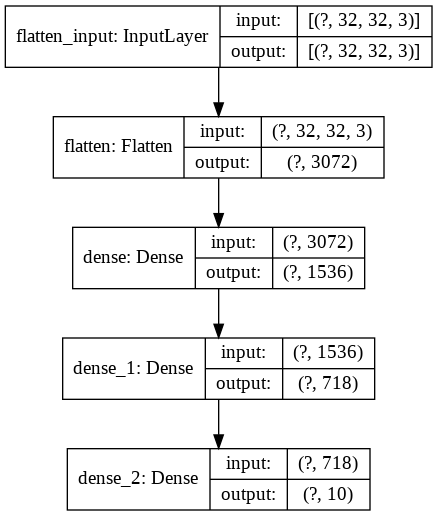

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# model.save("my_keras_model.h5") 
# cifar10_model_max = keras.models.load_model("my_keras_model.h5")

In [ ]:
cifar10_model.history['accuracy']

[0.40689998865127563,
 0.519599974155426,
 0.5800333619117737,
 0.6267666816711426,
 0.6735666394233704,
 0.7143333554267883,
 0.7534999847412109,
 0.7912333607673645,
 0.8221333622932434,
 0.8529333472251892]

In [40]:

# 데이터 갯수 4만 dense layer 3개일때 epoch 15 사용

model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.7480 - accuracy: 0.5340


[1.7479667663574219, 0.5339999794960022]

In [26]:

# dense layer 3개일때 epoch 10 사용

model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.6122 - accuracy: 0.5018


[1.6121819019317627, 0.501800000667572]

In [ ]:
# evaluate : 평가 -> test data와 target 주고 모델의 성능을 평가할 수 있음 -> predict와 비슷한 기능 
# 학습이 잘 되지 않았다. 
# dense layer 3개일때 

model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.8039 - accuracy: 0.5271


[1.8039073944091797, 0.5271000266075134]

In [ ]:
# dense layer 2개일때 

model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.8405 - accuracy: 0.4966


[1.8404611349105835, 0.4966000020503998]

In [ ]:
# model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
#                                                   restore_best_weights=True)
# history = model.fit(X_train, y_train, epochs=100,
#                     validation_data=(X_valid, y_valid),
#                     callbacks=[checkpoint_cb, early_stopping_cb])
# mse_test = model.evaluate(X_test, y_test)



In [34]:
# 더 편하게 보기 위해 pandas 이용한다.

import pandas as pd

df = pd.DataFrame(cifar10_model.history)
df.head()

,loss,accuracy
0,1.681335,0.407300
1,1.369007,0.522733
2,1.208362,0.584967
3,1.076084,0.633067
4,0.951556,0.680967


(0.0, 3.0)

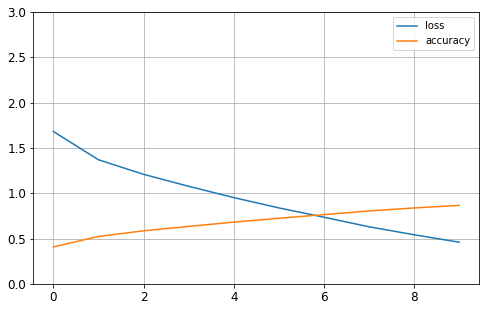

In [30]:
# df 시각화
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)

# 오차행렬이용해서 많이 틀리는 그림 찾기 


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def confu_matrix(X_train,y_train,model_RandomF):

  scaler = StandardScaler()
  model_RandomF_scaler = scaler.fit_transform(X_train.astype(np.float64))#forest를 Scaler해줌
  y_pred = cross_val_predict(model_RandomF, model_RandomF_scaler, y_train, cv=3)#예측한 값을 저장
  cm = confusion_matrix(y_train, y_pred)#오차행렬로 표시 

  return cm

cm = confu_matrix(X_train,y_train,model_RandomF)#오차행렬을 리턴받음
print(cm)#오차행렬 표시

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[[494  57  59  22  30  25  28  32 209  49]
 [ 39 427  17  35  40  34  61  32  69 220]
 [123  47 283  62 179  56 148  67  39  28]
 [ 53  52  76 206 109 183 170  60  28  79]
 [ 67  23 147  44 388  49 148  69  28  36]
 [ 25  36  84 152  85 312 105  70  31  37]
 [ 19  33 106  67 128  57 535  41   6  38]
 [ 52  51  52  54 141  69  66 393  28  95]
 [106  75  26  38  20  43  24  21 588  84]
 [ 55 130  12  33  13  24  41  34  98 541]]


In [ ]:

def predict(X_train,y_train,model_RandomF):
  scaler = StandardScaler()
  model_RandomF_scaler = scaler.fit_transform(X_train.astype(np.float64))#forest를 Scaler해줌
  y_pred = cross_val_predict(model_RandomF, model_RandomF_scaler, y_train, cv=3)#예측한 값을 저장
  return y_pred

y_pred = predict(X_train,y_train,model_RandomF)
# print(y_pred)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


automobile  와  truck 가 햇갈린다.


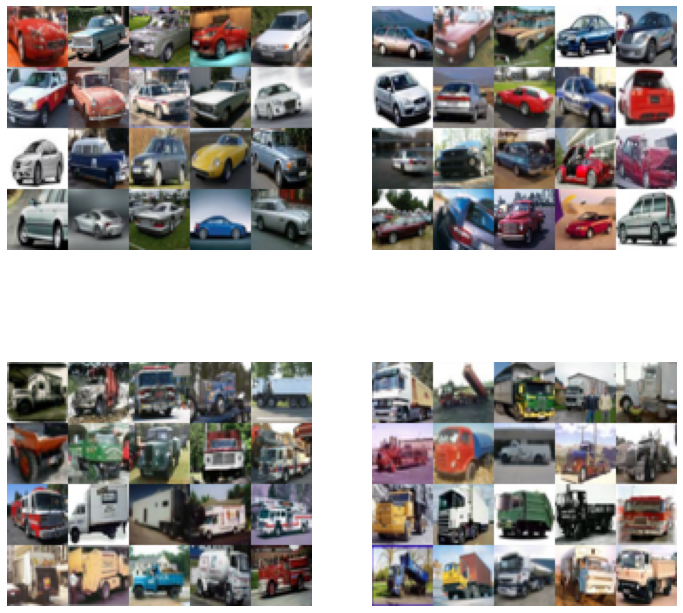

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 왼쪽 위 = automobil 인데 automobil이라고 한것. ->맞춘것
# 오른쪽 위 = automobil 인데 truck 이라고 한것. -> 틀린것
# 왼쪽 밑 = truck 인데 automobil이라고 한것. ->틀린것
# 오른쪽 밑 = truck 인데 truck 이라고 한것. -> 맞춘것


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

print(class_names[1]," 와 ", class_names[9], "가 햇갈린다.")

X_train = X_train.reshape(10000,3072)
y_train = y_train.reshape(-1,)# 차원이 안맞아서 X_train과 차원 맞춰줘야함


X_aa = X_train[(y_train == 1) & (y_pred == 1)]
X_ab = X_train[(y_train == 1) & (y_pred == 9)]
X_ba = X_train[(y_train == 9) & (y_pred == 1)]
X_bb = X_train[(y_train == 9) & (y_pred == 9)]



plt.figure(figsize=(12,12))
plt.subplot(221); plot_cifar10s(X_aa[:20], images_per_row=5)
plt.subplot(222); plot_cifar10s(X_ab[:20], images_per_row=5)
plt.subplot(223); plot_cifar10s(X_ba[:20], images_per_row=5)
plt.subplot(224); plot_cifar10s(X_bb[:20], images_per_row=5)
